## Project 1: E-Commerce Sales & Returns Analysis

#### **Objective**
To analyze sales, product performance, category-wise revenue, customer behavior, and store profitability using a global electronics retail dataset. The goal is to uncover actionable insights that can improve profitability, optimize inventory, and identify high-performing segments.

#### **Dataset Summary**
This dataset simulates an international electronics retailer and includes:

- **Sales.csv**: Order-level transaction data  
- **Products.csv**: Product pricing, cost, and category details  
- **Customers.csv**: Customer demographics and location  
- **Stores.csv**: Store size and location data  
- **Exchange_Rates.csv**: Currency conversion details  
- **Data_Dictionary.csv**: Column metadata

#### **Tools & Techniques**
- **Libraries Used**: Pandas, NumPy, Matplotlib, Seaborn  
- **Skills Demonstrated**: Data Cleaning, Exploratory Data Analysis (EDA), GroupBy Aggregation, Profitability Analysis, Visualization


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Customers_df = pd.read_csv('Customers.csv', encoding='latin1')
Data_Dictionary_df = pd.read_csv('Data_Dictionary.csv')
Exchange_Rates_df = pd.read_csv('Exchange_Rates.csv')
Products_df = pd.read_csv('Products.csv') 
Sales_df = pd.read_csv('Sales.csv')
Stores_df = pd.read_csv('Stores.csv')

In [4]:
Sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [5]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [6]:
Customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [7]:
Data_Dictionary_df.head()

,Table,Field,Description
0,Sales,Order Number,Unique ID for each order
1,Sales,Line Item,Identifies individual products purchased as pa...
2,Sales,Order Date,Date the order was placed
3,Sales,Delivery Date,Date the order was delivered
4,Sales,CustomerKey,Unique key identifying which customer placed t...


In [8]:
Data_Dictionary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        37 non-null     object
 1   Field        37 non-null     object
 2   Description  37 non-null     object
dtypes: object(3)
memory usage: 1020.0+ bytes


In [9]:
Exchange_Rates_df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [10]:
Exchange_Rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [11]:
Products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [12]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [13]:
Stores_df.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [14]:
Stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [15]:
# Data cleaning

### Data Cleaning & Preprocessing Summary

This section outlines the key data cleaning and preprocessing steps performed across all datasets to ensure consistency and readiness for analysis.

#### 1. Datetime Conversion
Converted relevant columns to datetime format for time-based analysis:
- `Sales_df`: `Order Date`, `Delivery Date`
- `Stores_df`: `Open Date`
- `Customers_df`: `Birthday`
- `Exchange_Rates_df`: `Date`

#### 2. Currency Format Cleaning
In `Products_df`, removed currency symbols and converted:
- `Unit Cost USD` and `Unit Price USD` → cleaned and cast to float

#### 3. Missing Values Handling
- **Customers_df**: Dropped the `State Code` column since `State` already exists and provides the necessary geographic detail.
- **Stores_df**: Imputed missing values in `Square Meters` using the median of the column.
- **Sales_df**:
  - Did not drop rows with missing `Delivery Date`, as approximately 79% were missing. Instead:
    - Created a `Delivery Status` column to mark each row as 'Delivered' or 'Unknown'.
    - Computed `Delivery Days` only where `Delivery Date` was available (others remain NaN).
  - Added a normalized `Date` column (based on `Order Date`) for easier aggregation.


In [17]:
#Convert date columns to datetime format
# Sales
Sales_df['Order Date'] = pd.to_datetime(Sales_df['Order Date'])
Sales_df['Delivery Date'] = pd.to_datetime(Sales_df['Delivery Date'])

# Stores
Stores_df['Open Date'] = pd.to_datetime(Stores_df['Open Date'])

# Customers
Customers_df['Birthday'] = pd.to_datetime(Customers_df['Birthday'])

# Exchange Rates
Exchange_Rates_df['Date'] = pd.to_datetime(Exchange_Rates_df['Date'])

In [18]:
#Clean currency columns in Products_df
# Remove $ sign and convert to float
Products_df['Unit Cost USD'] = Products_df['Unit Cost USD'].replace('[\\$,]', '', regex=True).astype(float)
Products_df['Unit Price USD'] = Products_df['Unit Price USD'].replace('[\\$,]', '', regex=True).astype(float)


In [19]:
#Check for missing values in all datasets
for df_name, df in [('Customers', Customers_df), 
                    ('Data Dictionary', Data_Dictionary_df), 
                    ('Exchange Rates', Exchange_Rates_df), 
                    ('Products', Products_df), 
                    ('Sales', Sales_df), 
                    ('Stores', Stores_df)]:
    print(f"\n{df_name} Missing Values:\n", df.isnull().sum())



Customers Missing Values:
 CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

Data Dictionary Missing Values:
 Table          0
Field          0
Description    0
dtype: int64

Exchange Rates Missing Values:
 Date        0
Currency    0
Exchange    0
dtype: int64

Products Missing Values:
 ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

Sales Missing Values:
 Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

Stores Missing Values:
 StoreKey         0
Country          0
State            0
Square Meters    1
Open Dat

In [20]:
# Drop 'State Code' since 'State' is already present
Customers_df.drop(columns=['State Code'], inplace=True)

In [21]:
# Filling one missing value of Square Meters with median
Stores_df['Square Meters'] = Stores_df['Square Meters'].fillna(Stores_df['Square Meters'].median())

In [22]:
# Add flag to indicate whether the delivery date is available
Sales_df['Delivery Status'] = np.where(Sales_df['Delivery Date'].notna(), 'Delivered', 'Unknown')

# Calculate delivery days (will be NaN if delivery date is missing)
Sales_df['Delivery Days'] = (Sales_df['Delivery Date'] - Sales_df['Order Date']).dt.days


In [23]:
Sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Delivery Status,Delivery Days
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Unknown,NaN
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Delivered,12.0
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Delivered,12.0
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Delivered,11.0
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Delivered,11.0


In [24]:
# Check missing values across all columns in all key datasets
for name, df in [
    ("Sales", Sales_df),
    ("Products", Products_df),
    ("Customers", Customers_df),
    ("Stores", Stores_df),
    ("Exchange Rates", Exchange_Rates_df)
]:
    print(f"\n{name} Missing Values:\n", df.isnull().sum())



Sales Missing Values:
 Order Number           0
Line Item              0
Order Date             0
Delivery Date      49719
CustomerKey            0
StoreKey               0
ProductKey             0
Quantity               0
Currency Code          0
Delivery Status        0
Delivery Days      49719
dtype: int64

Products Missing Values:
 ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

Customers Missing Values:
 CustomerKey    0
Gender         0
Name           0
City           0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

Stores Missing Values:
 StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

Exchange Rates Missing Values:
 Date        0
Currency    0
Exchange    0
dtype: int64


In [25]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order Number     62884 non-null  int64         
 1   Line Item        62884 non-null  int64         
 2   Order Date       62884 non-null  datetime64[ns]
 3   Delivery Date    13165 non-null  datetime64[ns]
 4   CustomerKey      62884 non-null  int64         
 5   StoreKey         62884 non-null  int64         
 6   ProductKey       62884 non-null  int64         
 7   Quantity         62884 non-null  int64         
 8   Currency Code    62884 non-null  object        
 9   Delivery Status  62884 non-null  object        
 10  Delivery Days    13165 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 5.3+ MB


In [26]:
Sales_df.describe()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Delivery Days
count,6.288400e+04,62884.000000,62884,13165,6.288400e+04,62884.000000,62884.000000,62884.000000,13165.000000
mean,1.430905e+06,2.164207,2018-11-30 21:21:56.939126016,2019-01-16 16:14:21.921762304,1.180797e+06,31.802144,1125.859344,3.144790,4.529130
min,3.660000e+05,1.000000,2016-01-01 00:00:00,2016-01-06 00:00:00,3.010000e+02,0.000000,1.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,2018-01-25 00:00:00,2018-05-05 00:00:00,6.808580e+05,8.000000,437.000000,1.000000,3.000000
50%,1.498016e+06,2.000000,2019-02-06 00:00:00,2019-03-05 00:00:00,1.261200e+06,37.000000,1358.000000,2.000000,4.000000
75%,1.788010e+06,3.000000,2019-11-23 00:00:00,2019-12-18 00:00:00,1.686496e+06,53.000000,1650.000000,4.000000,6.000000
max,2.243032e+06,7.000000,2021-02-20 00:00:00,2021-02-27 00:00:00,2.099937e+06,66.000000,2517.000000,10.000000,17.000000
std,4.532963e+05,1.365170,NaN,NaN,5.859634e+05,22.978188,709.244010,2.256371,2.121071


In [27]:
Sales_df['Currency Code'].value_counts()

Currency Code
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64

In [28]:
Exchange_Rates_df.head()

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [29]:
Exchange_Rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [30]:
Exchange_Rates_df.tail()

,Date,Currency,Exchange
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238
11214,2021-02-20,GBP,0.7126


In [31]:
# Convert 'Order Date' column to datetime format and normalize to remove time component (set time to 00:00:00)
Sales_df['Date'] = pd.to_datetime(Sales_df['Order Date']).dt.normalize()

In [32]:
Exchange_Rates_df.rename(columns={
    'Currency': 'Currency Code',
    'Exchange': 'Exchange Rate'
}, inplace=True)

In [33]:
# Merging Sales_df and Exchange_Rates_df on 'Date' & 'Currency Code'
Sales_df = Sales_df.merge(Exchange_Rates_df, on=['Date', 'Currency Code'], how='left')

In [34]:
Sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Delivery Status,Delivery Days,Date,Exchange Rate
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Unknown,NaN,2016-01-01,1.3884
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Delivered,12.0,2016-01-01,1.0000
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Delivered,12.0,2016-01-01,1.0000
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Delivered,11.0,2016-01-01,1.3884
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Delivered,11.0,2016-01-01,1.3884


In [35]:
Products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [36]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [37]:
# Merging Sales_df & Product_df on 'ProductKey'

Sales_df = Sales_df.merge(
    Products_df[['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'Category']],
    on='ProductKey',
    how='left'
)

In [38]:
Sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Delivery Status,Delivery Days,Date,Exchange Rate,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,Category
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Unknown,NaN,2016-01-01,1.3884,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,Cameras & Camcorders Accessories,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Delivered,12.0,2016-01-01,1.0000,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,Digital SLR Cameras,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Delivered,12.0,2016-01-01,1.0000,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,Microwaves,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Delivered,11.0,2016-01-01,1.3884,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,Digital SLR Cameras,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Delivered,11.0,2016-01-01,1.3884,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,Laptops,Computers


In [39]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order Number     62884 non-null  int64         
 1   Line Item        62884 non-null  int64         
 2   Order Date       62884 non-null  datetime64[ns]
 3   Delivery Date    13165 non-null  datetime64[ns]
 4   CustomerKey      62884 non-null  int64         
 5   StoreKey         62884 non-null  int64         
 6   ProductKey       62884 non-null  int64         
 7   Quantity         62884 non-null  int64         
 8   Currency Code    62884 non-null  object        
 9   Delivery Status  62884 non-null  object        
 10  Delivery Days    13165 non-null  float64       
 11  Date             62884 non-null  datetime64[ns]
 12  Exchange Rate    62884 non-null  float64       
 13  Product Name     62884 non-null  object        
 14  Brand            62884 non-null  objec

In [40]:
# Revenue = Unit Price * Quantity
Sales_df['Revenue USD'] = Sales_df['Unit Price USD'] * Sales_df['Quantity']
# Cost = Unit Cost * Quantity
Sales_df['Cost USD'] = Sales_df['Unit Cost USD'] * Sales_df['Quantity']
# Profit = Revenue - Cost
Sales_df['Profit USD'] = Sales_df['Revenue USD'] - Sales_df['Cost USD']
# Profit Margin (%) = (Profit / Revenue) * 100
Sales_df['Profit Margin (%)'] = (Sales_df['Profit USD'] / Sales_df['Revenue USD']) * 100

In [41]:
Sales_df[['Revenue USD', 'Cost USD', 'Profit USD', 'Profit Margin (%)']].describe()

,Revenue USD,Cost USD,Profit USD,Profit Margin (%)
count,62884.000000,62884.000000,62884.000000,62884.000000
mean,886.640156,367.228408,519.411748,54.904210
std,1648.480286,614.548869,1052.204029,6.412808
min,0.950000,0.480000,0.470000,48.945148
25%,115.000000,52.880000,61.560000,49.021135
50%,360.000000,164.160000,194.440000,54.013193
75%,969.000000,423.080000,540.140000,54.018445
max,31999.900000,10602.200000,21397.700000,66.885103


### Summary Insights: Sales & Profitability

---

#### Revenue:
- Average revenue per transaction: \$886.26  
- Highest revenue recorded: \$31,999.90 – likely from high-ticket items like laptops, TVs, or appliances.

#### Cost:
- Mean cost per transaction: \$367.22  
- Highest cost recorded: \$10,602.20

#### Profit:
- Average profit per transaction: \$519.41  
- Maximum profit from a single sale: \$21,397.70

#### Profit Margin (%):
- Average profit margin: ~54.9% – indicates strong profitability.
- Range: ~48.9% to 66.9% – shows consistent markup across products.

### Product Level Performance Analysis

In [44]:
product_perf = Sales_df.groupby('Product Name').agg({
    'Quantity': 'sum',
    'Revenue USD': 'sum',
    'Cost USD': 'sum',
    'Profit USD': 'sum',
    'Profit Margin (%)': 'mean',
    'Unit Price USD': 'mean'
}).sort_values(by='Revenue USD', ascending=False).reset_index()

In [45]:
product_perf.head()

,Product Name,Quantity,Revenue USD,Cost USD,Profit USD,Profit Margin (%),Unit Price USD
0,WWI Desktop PC2.33 X2330 Black,550,505450.0,167464.00,337986.00,66.868335,919.0
1,Adventure Works Desktop PC2.33 XD233 Silver,481,466089.0,154425.05,311663.95,66.867905,969.0
2,Adventure Works Desktop PC2.33 XD233 Brown,479,464151.0,153782.95,310368.05,66.867905,969.0
3,Adventure Works Desktop PC2.33 XD233 Black,462,447678.0,148325.10,299352.90,66.867905,969.0
4,Adventure Works Desktop PC2.33 XD233 White,451,437019.0,144793.55,292225.45,66.867905,969.0


### Product Performance Insights

- **Top-selling product by revenue**: "WWI Desktop PC2.33 X2330 Black" with over \\$505K in revenue and approximately $337K in profit.
- **Consistent High Margin**: Top 5 products have a profit margin of ~66.87%, indicating a standardized pricing and cost strategy.
- **Premium Product Category**: These products are all high-end desktop PCs, showing strong demand in the computing segment.

In [47]:
# Group by Category and aggregate key metrics
category_perf = Sales_df.groupby('Category').agg({
    'Quantity': 'sum',
    'Revenue USD': 'sum',
    'Cost USD': 'sum',
    'Profit USD': 'sum',
    'Profit Margin (%)': 'mean'
}).reset_index()

In [48]:
# Sort by Revenue or Profit for insights
category_perf = category_perf.sort_values(by='Revenue USD', ascending=False)

In [49]:
# Round for better readability
category_perf = category_perf.round(2)
category_perf

,Category,Quantity,Revenue USD,Cost USD,Profit USD,Profit Margin (%)
3,Computers,44151,19301595.46,8024147.56,11277447.90,54.54
5,Home Appliances,18401,10795478.59,4499139.74,6296338.85,53.73
1,Cameras and camcorders,17609,6520168.02,2600367.03,3919800.99,56.35
2,Cell phones,31477,6183791.22,2685164.68,3498626.54,54.65
7,TV and Video,11236,5928982.69,2392288.30,3536694.39,54.55
0,Audio,23490,3169627.74,1341775.97,1827851.77,55.32
6,"Music, Movies and Audio Books",28802,3131006.44,1221747.27,1909259.17,57.14
4,Games and Toys,22591,724829.43,328160.66,396668.77,52.67


C:\Users\shant\AppData\Local\Temp\ipykernel_11968\1141074589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue USD', y='Category', data=category_perf_sorted, palette='crest')


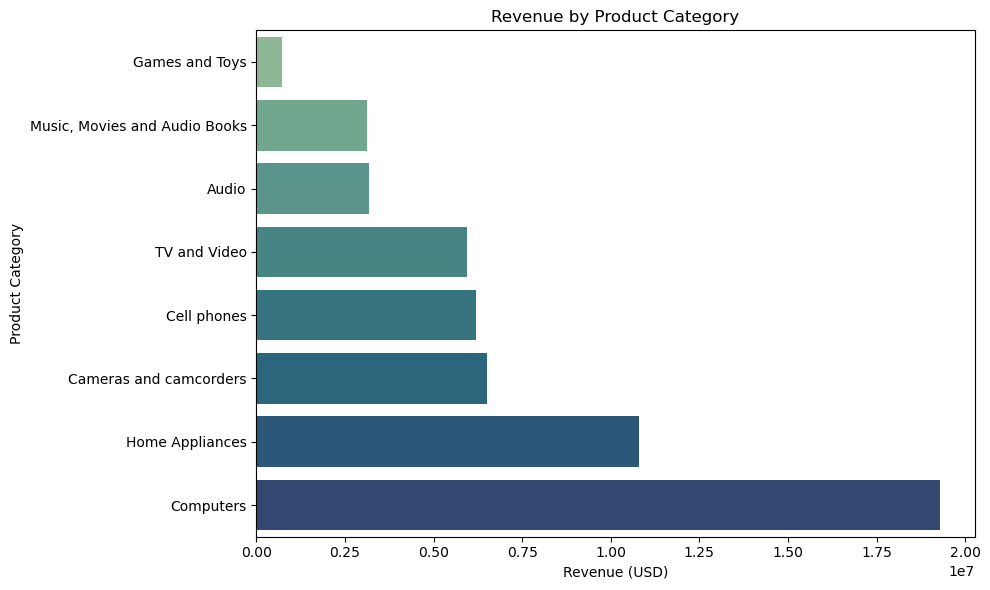

In [50]:
## Category-Wise Performance Visualization
# Sort for better visuals
category_perf_sorted = category_perf.sort_values(by='Revenue USD', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue USD', y='Category', data=category_perf_sorted, palette='crest')

plt.title('Revenue by Product Category')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### Category-wise Sales Performance Insights

- **Top Earning Category**:  
  Computers lead with approx \\\$19.1M in revenue and over \\$11.3M in profit.  
  Clearly the strongest driver of business revenue.

- **Next in Line**:  
  Home Appliances follow with $10.2M revenue and healthy profitability.  
  Shows consistent consumer demand for large appliances.

- **Other Strong Performers**:  
  Cameras and Camcorders, Cell Phones, and TV & Video each generated over $5M–7M, reflecting a balanced portfolio in electronics.

- **Highest Profit Margin**:  
  Music, Movies, and Audio Books delivered the highest average margin (~57.1%) despite lower revenue, indicating strong markup potential on low-cost digital goods.

- **Low Performer**:  
  Games and Toys category shows lowest revenue and profit.  
  Might require reconsideration in inventory or marketing focus.

In [52]:
Stores_df.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09


In [53]:
Stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Country        67 non-null     object        
 2   State          67 non-null     object        
 3   Square Meters  67 non-null     float64       
 4   Open Date      67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [54]:
# Merging Sales_df & Stores_df on 'Storekey'
Sales_df = Sales_df.merge(
    Stores_df[['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date']],
    on='StoreKey',
    how='left'
)

In [55]:
Sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Delivery Status,...,Subcategory,Category,Revenue USD,Cost USD,Profit USD,Profit Margin (%),Country,State,Square Meters,Open Date
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Unknown,...,Cameras & Camcorders Accessories,Cameras and camcorders,68.00,31.27,36.73,54.014706,Canada,Nunavut,1210.0,2015-04-04
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Delivered,...,Digital SLR Cameras,Cameras and camcorders,854.00,282.94,571.06,66.868852,Online,Online,1347.5,2010-01-01
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Delivered,...,Microwaves,Home Appliances,665.94,220.64,445.30,66.867886,Online,Online,1347.5,2010-01-01
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Delivered,...,Digital SLR Cameras,Cameras and camcorders,2254.00,1036.56,1217.44,54.012422,Online,Online,1347.5,2010-01-01
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Delivered,...,Laptops,Computers,326.00,166.20,159.80,49.018405,Online,Online,1347.5,2010-01-01


In [56]:
Sales_df[['Country', 'State']].head()

,Country,State
0,Canada,Nunavut
1,Online,Online
2,Online,Online
3,Online,Online
4,Online,Online


In [57]:
# Country wise sales performance
country_perf = Sales_df.groupby('Country').agg({
    'Quantity': 'sum',
    'Revenue USD': 'sum',
    'Cost USD': 'sum',
    'Profit USD': 'sum'
}).reset_index()

In [58]:
country_perf['Profit Margin (%)'] = (country_perf['Profit USD'] / country_perf['Revenue USD']) * 100
country_perf = country_perf.sort_values(by='Revenue USD', ascending=False)
country_perf

,Country,Quantity,Revenue USD,Cost USD,Profit USD,Profit Margin (%)
8,United States,83638,23764425.86,9842266.81,13922159.05,58.584033
6,Online,41311,11404324.63,4731631.99,6672692.64,58.510196
7,United Kingdom,20625,5749769.78,2398269.46,3351500.32,58.289296
3,Germany,14880,4246279.22,1749744.61,2496534.61,58.793463
1,Canada,12991,3611561.79,1507423.83,2104137.96,58.261165
0,Australia,7085,2099141.07,855511.20,1243629.87,59.244702
4,Italy,6986,2059086.81,849992.90,1209093.91,58.719909
5,Netherlands,5909,1591344.48,653579.12,937765.36,58.929124
2,France,4332,1229545.95,504371.29,725174.66,58.979061


### Country-wise Sales Performance Summary (Top 5 countries by profit)

**United States**  
Highest revenue-generating country with **$13.92M** in profit. Operates at a strong average margin of **58.58%**.

**Online Sales (E-Commerce Channel)**  
A major contributor with **$6.67M** in profit, showing the significance of the e-commerce channel. Margin: **58.51%**.

**United Kingdom**  
Contributed **$3.35M** profit with a stable margin of **58.29%**.

**Germany**  
Recorded **$4.25M** revenue and the highest profit margin among top countries at **58.79%**, indicating efficient cost control.

**Canada**  
Revenue at **$2.10M**, operating at a margin of **58.26%**, close to global averages.

In [60]:
# Customer-wise Performance
customer_perf = Sales_df.groupby('CustomerKey').agg({
    'Order Number': 'nunique',      # Number of unique orders
    'Quantity': 'sum',              # Total items purchased
    'Revenue USD': 'sum',           # Total spend
    'Profit USD': 'sum'             # Total profit generated
}).reset_index()

In [61]:
# Renaming columns for clarity
customer_perf.rename(columns={
    'Order Number': 'Total Orders',
    'Quantity': 'Total Quantity',
    'Revenue USD': 'Total Revenue',
    'Profit USD': 'Total Profit'
}, inplace=True)

In [62]:
# Calculate Average Order Value
customer_perf['Avg Order Value'] = (customer_perf['Total Revenue'] / customer_perf['Total Orders']).round(2)

In [63]:
# Preview
customer_perf.sort_values(by='Total Revenue', ascending=False).head()

,CustomerKey,Total Orders,Total Quantity,Total Revenue,Total Profit,Avg Order Value
9371,1702221,9,75,61871.70,39606.02,6874.63
10515,1884663,3,30,43517.80,28819.96,14505.93
11072,1969704,7,60,42788.04,26008.23,6112.58
2743,535496,3,35,41521.53,26957.37,13840.51
2840,551036,4,36,40556.54,26716.09,10139.13


### Customer Segmentation Summary – Revenue & Orders

**Top Customers by Revenue:**

- The highest spending customer ("CustomerKey 1702221") placed 9 orders totaling **\\\$61.8K** in revenue and **\\\$39.6K** in profit, with an average order value of **\\\$6.9K**.
- Other top customers had average order values ranging from **\\\$6.1K** to **\\\$14.5K**, suggesting purchases of high-ticket items like desktops, laptops, or TVs.

**Key Observations:**

- Customers with fewer orders but higher spend (e.g., "CustomerKey 1884663") are likely high-value buyers.
- The top 5 customers together generated over **$148K** in profit.
- This highlights that a small segment of customers drives a large portioZzn of revenue, supporting the 80/20 Pareto principle.

In [65]:
## Time Series Analysis - Sales over Time

In [66]:
Sales_df['Order Month'] = Sales_df['Order Date'].dt.to_period('M')

In [67]:
# Monthly performance metrics
monthly_perf = Sales_df.groupby('Order Month').agg({
    'Order Number': 'nunique',
    'Quantity': 'sum',
    'Revenue USD': 'sum',
    'Profit USD': 'sum'
}).reset_index()

In [68]:
# Rename columns for clarity
monthly_perf.rename(columns={
    'Order Number': 'Total Orders',
    'Quantity': 'Total Quantity',
    'Revenue USD': 'Total Revenue',
    'Profit USD': 'Total Profit'
}, inplace=True)

In [69]:
# Sort by Order Month
monthly_perf.sort_values('Order Month', inplace=True)
# Preview
monthly_perf.head()

,Order Month,Total Orders,Total Quantity,Total Revenue,Total Profit
0,2016-01,292,2116,649918.78,388268.96
1,2016-02,334,2676,891098.30,531722.75
2,2016-03,109,895,338407.36,203506.99
3,2016-04,41,326,110591.63,66231.19
4,2016-05,220,1646,595986.18,356049.32


### Monthly Sales Performance Summary

**January 2016**  
Orders: 292  
Revenue: \\$649.9K  
Profit: \\$388.3K  

**February 2016**  
Strongest performance so far  
Orders: 334  
Revenue: \\$891.1K  
Profit: \\$531.7K  

**March 2016**  
Moderate dip in volume and revenue  
Orders: 109  
Revenue: \\$338.4K  
Profit: \\$203.5K  

**April 2016**  
Lowest performing month  
Orders: 41  
Revenue: \\$110.6K  
Profit: \\$66.2K  

**May 2016**  
Recovery observed  
Orders: 220  
Revenue: \\$596K  
Profit: \\$356K  

**Insight:**  
Sales peaked in February, followed by a dip in April. May shows signs of recovery, indicating potential seasonality or external business cycles.

In [71]:
Sales_df['Order Month'].dtype

period[M]

In [72]:
# Ensure 'Order Month' is in datetime format for proper sorting
Sales_df['Order Month'] = Sales_df['Order Month'].astype(str)

In [73]:
# Prepare the monthly summary
monthly_trend = Sales_df.groupby('Order Month').agg({
    'Order Number': 'nunique',
    'Quantity': 'sum',
    'Revenue USD': 'sum',
    'Profit USD': 'sum'
}).reset_index()

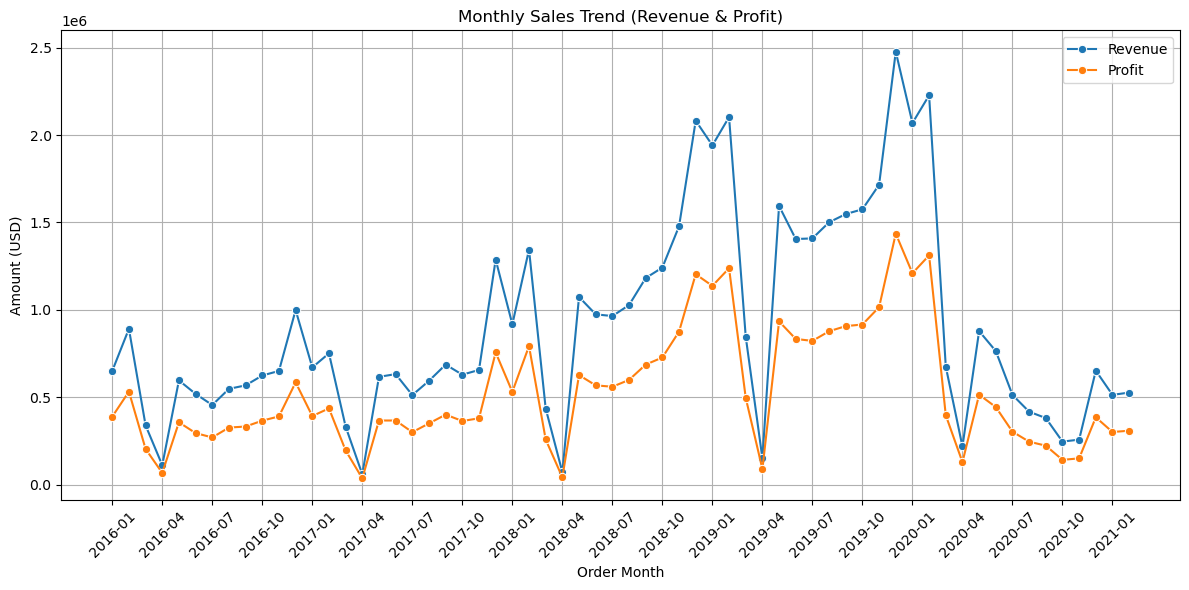

In [74]:
# Plot revenue and profit trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Order Month', y='Revenue USD', label='Revenue', marker='o')
sns.lineplot(data=monthly_trend, x='Order Month', y='Profit USD', label='Profit', marker='o')

plt.xticks(
    ticks=range(0, len(monthly_trend), 3),  # Show every 3rd tick
    labels=monthly_trend['Order Month'].astype(str)[::3],  # Corresponding month labels
    rotation=45  # Rotate for readability
)


plt.title('Monthly Sales Trend (Revenue & Profit)')
plt.xlabel('Order Month')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### Monthly Sales Trend Summary – Revenue & Profit

Insights from the Trend Plot:

- Seasonal Spikes: Revenue and Profit show regular spikes around November–December, indicating strong holiday or year-end sales.
- Growth Phase: There's a noticeable upward trend from mid-2016 to late 2019, showing business growth and expansion.
- Pandemic Impact: A sharp dip is observed in early 2020, likely due to COVID-19, followed by slow recovery.
- Revenue-Profit Consistency: The consistent gap between revenue and profit lines suggests stable cost structures and consistent profit margins over time.
- 2021 Stabilization: Although volumes dropped compared to peak periods, revenue and profit trends appear to stabilize by early 2021.

In [76]:
### Product Category Performance Over Time 

In [77]:
category_monthly = Sales_df.groupby(['Category', 'Order Month']).agg({
    'Quantity': 'sum',
    'Revenue USD': 'sum',
    'Profit USD': 'sum'
}).reset_index()

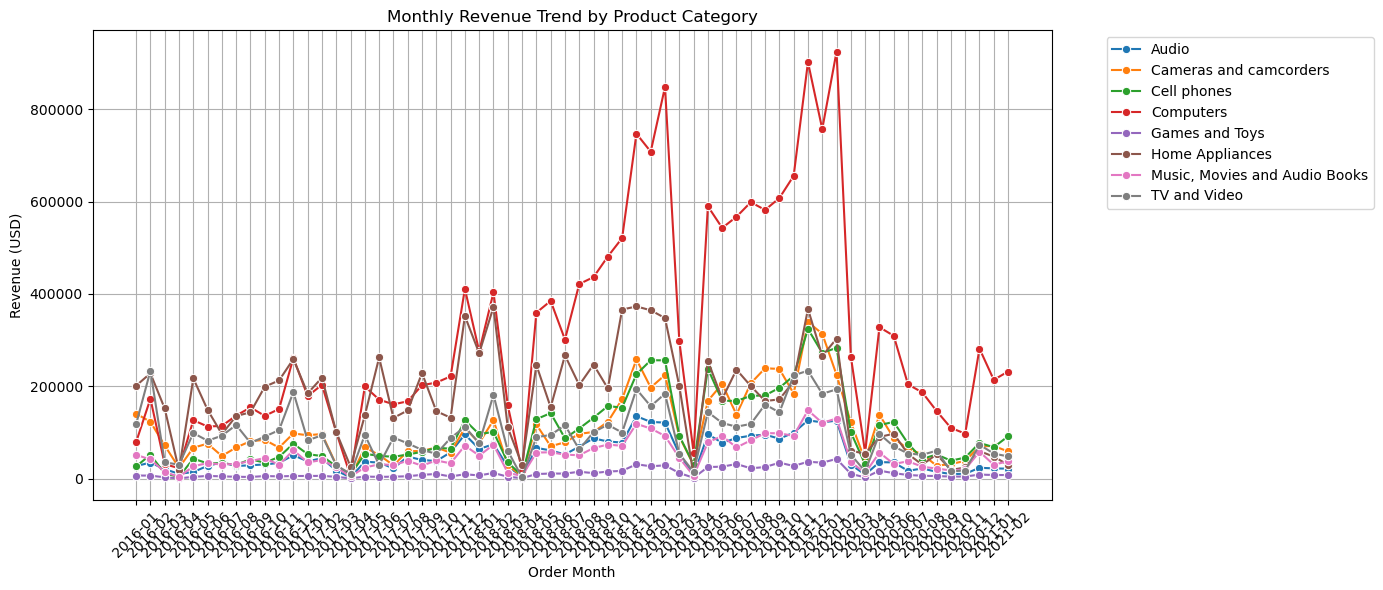

In [78]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=category_monthly, x='Order Month', y='Revenue USD', hue='Category', marker='o')

plt.title('Monthly Revenue Trend by Product Category')
plt.xlabel('Order Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

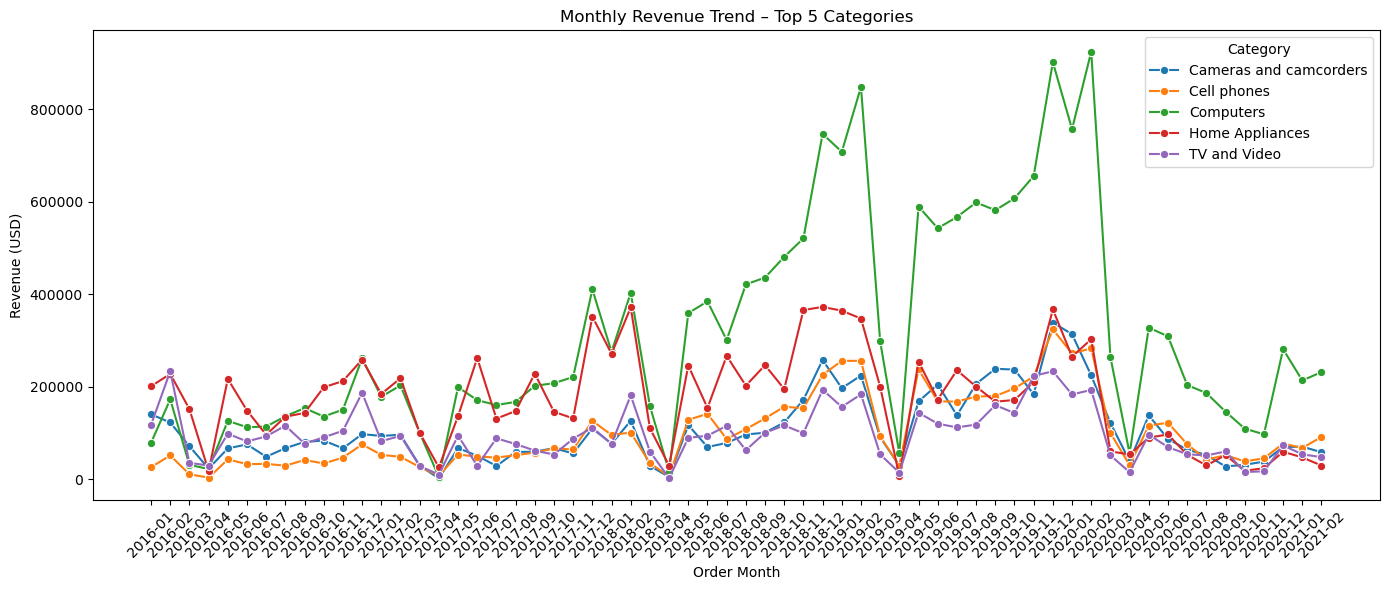

In [79]:
# Get top 5 categories by total revenue
top_categories = Sales_df.groupby('Category')['Revenue USD'].sum().sort_values(ascending=False).head(5).index

# Filter data for only those top categories
top_category_monthly = Sales_df[Sales_df['Category'].isin(top_categories)] \
    .groupby(['Order Month', 'Category'])['Revenue USD'].sum().reset_index()

# Plot again
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_category_monthly, x='Order Month', y='Revenue USD', hue='Category', marker='o')
plt.title('Monthly Revenue Trend – Top 5 Categories')
plt.xlabel('Order Month')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Product Category Revenue Trend – Top 5 Categories

**Key Insights:**

- **Computers** dominated the revenue among all categories, especially between mid-2018 and early 2020, peaking at over 850K in some months.
- **Home Appliances** and **TV and Video** showed consistent and moderate revenue contributions throughout the period.
- **Cell Phones** experienced steady growth and occasional spikes, indicating rising demand in certain months.
- **Cameras and Camcorders** had the lowest performance among the top five but still maintained stable sales across months.
- The sharp dip around early 2020 across all categories may reflect external factors like supply chain disruptions or seasonal slowdown.

**Conclusion:**  
Computers are the primary revenue drivers, while other categories contribute more consistently. Monitoring such category trends helps prioritize marketing and inventory strategies.


In [81]:
## Top products by revenue and profit

In [82]:
top_products = Sales_df.groupby('Product Name')[['Revenue USD', 'Profit USD']].sum().reset_index()

In [83]:
top_rev_products = top_products.sort_values(by='Revenue USD', ascending=False).head(10)
top_profit_products = top_products.sort_values(by='Profit USD', ascending=False).head(10)

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\3035804186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rev_products, x='Revenue USD', y='Product Name', palette='Blues_d')


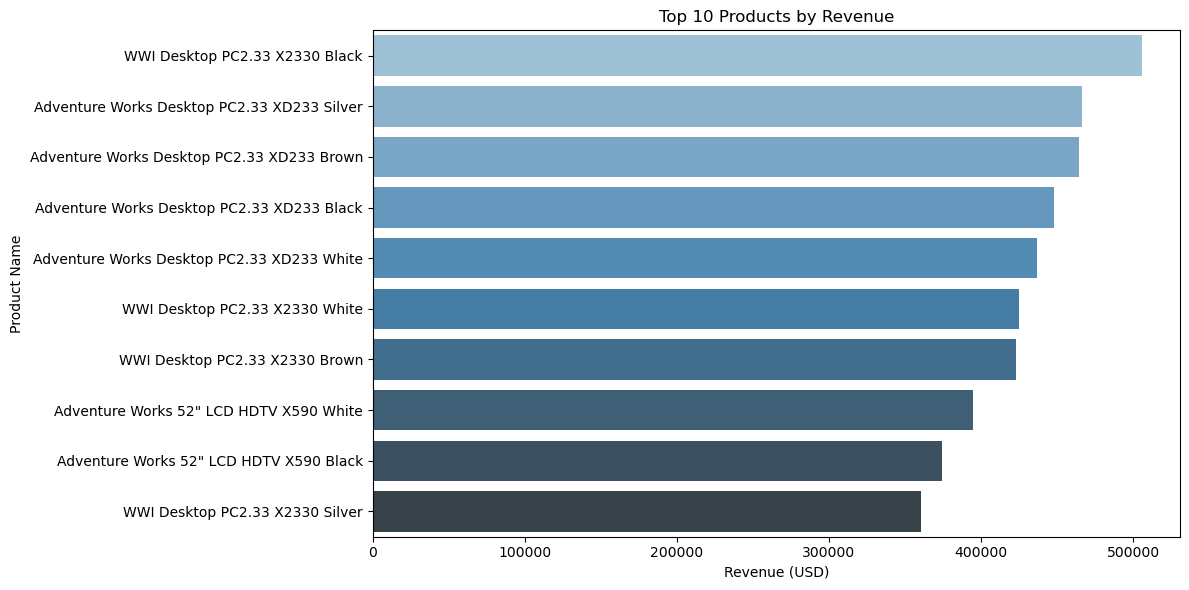

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\3035804186.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_products, x='Profit USD', y='Product Name', palette='Greens_d')


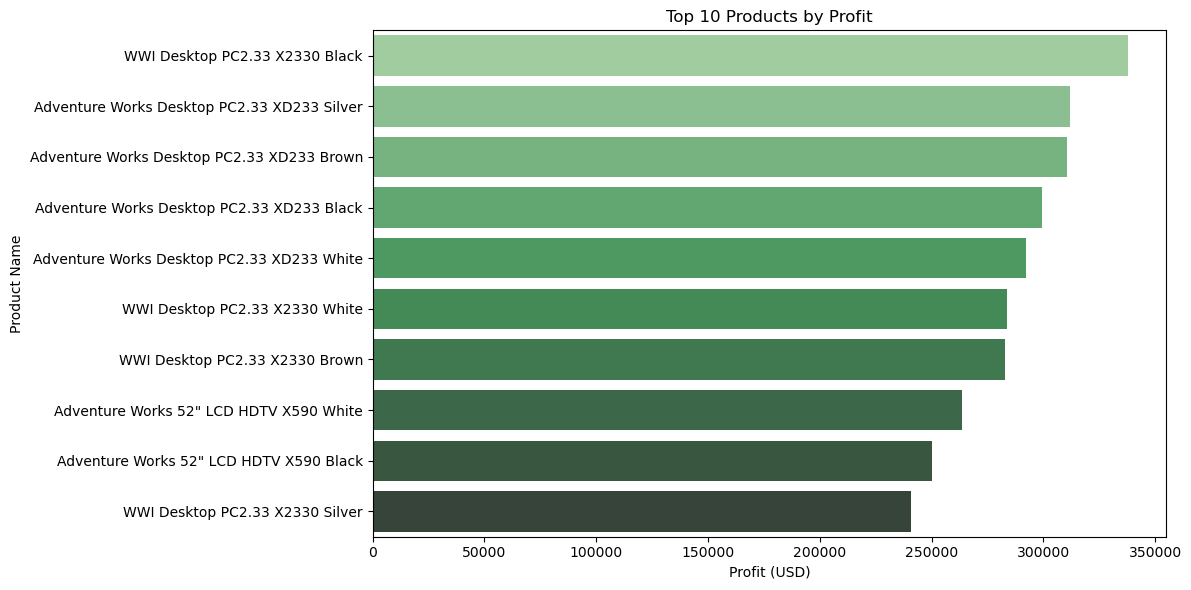

In [84]:
# Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rev_products, x='Revenue USD', y='Product Name', palette='Blues_d')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Profit
plt.figure(figsize=(12, 6))
sns.barplot(data=top_profit_products, x='Profit USD', y='Product Name', palette='Greens_d')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### Top Performing Products – Revenue & Profit

#### Top 10 Products by Revenue
- High revenue was mainly generated by **WWI Desktop PC2.33 X2330 Black** and **Adventure Works Desktop PC2.33 XD233 Silver**, each exceeding **$450K**.
- Most products in the top 10 belong to **high-end desktops** and **HDTVs**, indicating strong customer interest in premium electronics.

#### Top 10 Products by Profit
- **WWI Desktop PC2.33 X2330 Black** again leads in profit, contributing over **$300K**.
- Profit trends closely follow revenue, affirming that top revenue-generating products also deliver high margins.

#### Insight:
Products with high unit value like desktops and televisions not only attract large revenues but also contribute significantly to profits, making them critical for business growth and pricing strategy.

In [86]:
### Low performing products

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\2586868403.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_rev_products, x='Revenue USD', y='Product Name', palette='Reds_d')


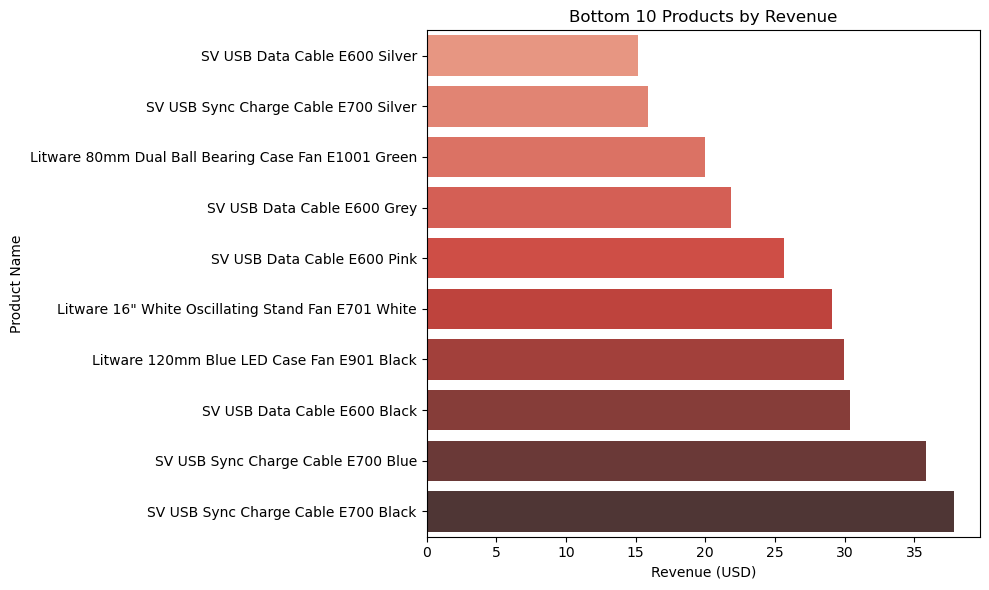

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\2586868403.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_profit_products, x='Profit USD', y='Product Name', palette='Oranges_d')


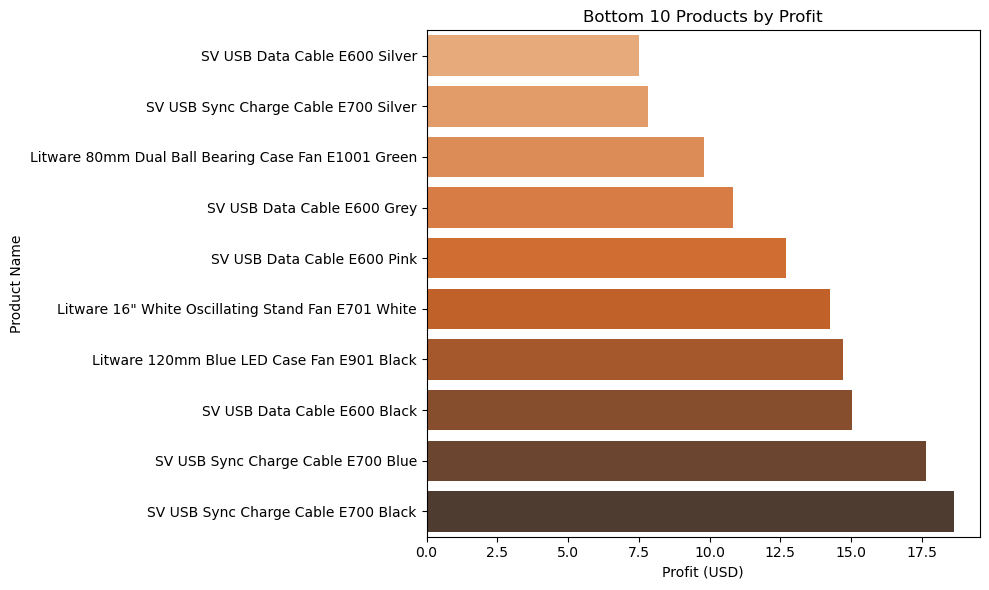

In [87]:
# Bottom 10 products by Revenue
bottom_rev_products = Sales_df.groupby('Product Name')['Revenue USD'].sum() \
    .sort_values(ascending=True).head(10).reset_index()

# Bottom 10 products by Profit
bottom_profit_products = Sales_df.groupby('Product Name')['Profit USD'].sum() \
    .sort_values(ascending=True).head(10).reset_index()

# Plotting Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_rev_products, x='Revenue USD', y='Product Name', palette='Reds_d')
plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Plotting Profit
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_profit_products, x='Profit USD', y='Product Name', palette='Oranges_d')
plt.title('Bottom 10 Products by Profit')
plt.xlabel('Profit (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### Bottom 10 Products by Revenue and Profit

The bar plots below highlight the least-performing products in terms of **Revenue** and **Profit**.

Most of these items are low-cost accessories, such as **USB cables** and **computer fans**, indicating either:
- Low margins  
- Limited demand  
- Or high discounting  

These insights are useful for identifying weaknesses in the product portfolio and taking actions to optimize inventory and profitability.

#### Key Observations:
1. **SV USB Data Cable E600** variants (Silver, Grey, Pink, Black) appear consistently at the bottom for both revenue and profit.
2. Several **Litware fan models** also underperform in terms of sales.
3. There's a strong correlation between low revenue and low profit in these bottom products.

In [89]:
## Revenue and profit by Country

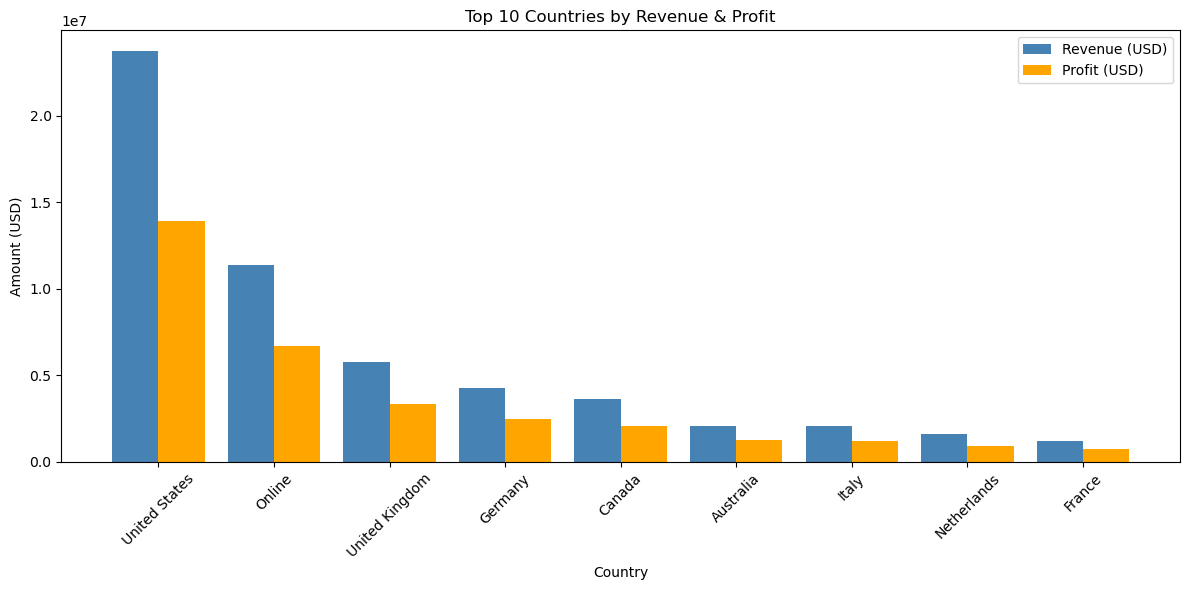

In [90]:
# Grouping by Country and aggregating Revenue & Profit
country_summary = Sales_df.groupby('Country')[['Revenue USD', 'Profit USD']].sum().sort_values(by='Revenue USD', ascending=False).reset_index()

# Top 10 Countries by Revenue
top_countries = country_summary.head(10)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(top_countries))

# Revenue bars
plt.bar(index, top_countries['Revenue USD'], bar_width, label='Revenue (USD)', color='steelblue')

# Profit bars (next to revenue)
plt.bar(index + bar_width, top_countries['Profit USD'], bar_width, label='Profit (USD)', color='orange')

# X-axis setup
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.title('Top 10 Countries by Revenue & Profit')
plt.xticks(index + bar_width / 2, top_countries['Country'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

###  Top 10 Countries by Revenue & Profit

This bar chart displays the top 10 countries that contributed the most to overall revenue and profit. Key highlights:

- **United States** dominates with the highest revenue and profit, indicating a strong and consistent customer base.
- **Online sales** hold the second position, showcasing the importance of e-commerce in driving revenue.
- **United Kingdom**, **Germany**, and **Canada** follow, making up the core international markets.
- The **drop in profit** compared to revenue in some countries (e.g., Germany and Italy) could indicate higher operational costs or discounts.

This insight helps identify which regions are the most profitable and where strategic improvements might be necessary to optimize profitability.


In [92]:
## Revenue and profit by Store Type

In [93]:
Stores_df.columns

Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')

In [94]:
Stores_df.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09


In [95]:
Stores_df['Square Meters'].describe()

count      67.000000
mean     1401.380597
std       572.059723
min       245.000000
25%      1112.500000
50%      1347.500000
75%      2000.000000
max      2105.000000
Name: Square Meters, dtype: float64

In [96]:
# Categorize stores based on their size (in square meters) into defined size categories
# 'pd.cut' segments the 'Square Meters' column into bins:
# [0–1000) = 'Small', [1000–1500) = 'Medium', [1500–2000) = 'Large', [2000 and above) = 'XL'

bins = [0, 1000, 1500, 2000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'XL']

Stores_df['Store Size Category'] = pd.cut(Stores_df['Square Meters'], bins=bins, labels=labels)

In [97]:
Sales_df = Sales_df.merge(
    Stores_df[['StoreKey', 'Store Size Category']],
    on='StoreKey',
    how='left'
)

In [98]:
store_size_perf = Sales_df.groupby('Store Size Category')[['Revenue USD', 'Profit USD']].sum().reset_index().sort_values(by='Revenue USD', ascending=False)

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\2154842659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_size_perf = Sales_df.groupby('Store Size Category')[['Revenue USD', 'Profit USD']].sum().reset_index().sort_values(by='Revenue USD', ascending=False)


C:\Users\shant\AppData\Local\Temp\ipykernel_11968\4016223396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_size_perf, x='Store Size Category', y='Revenue USD', palette='Blues_d')


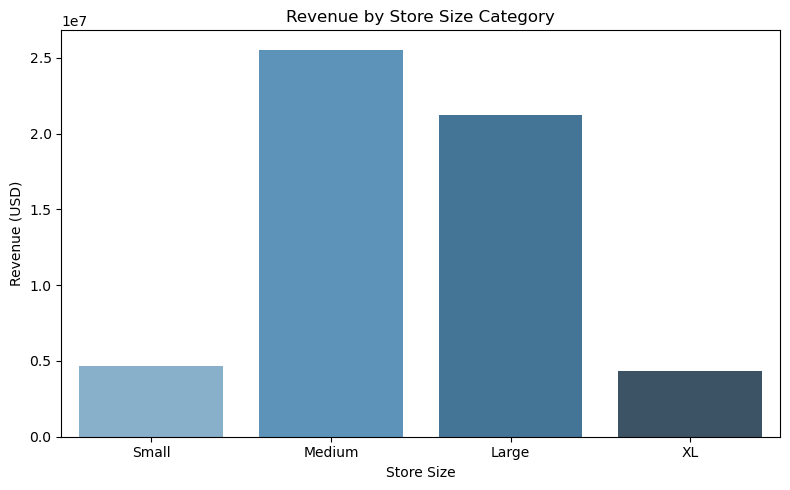

In [99]:
plt.figure(figsize=(8, 5))
sns.barplot(data=store_size_perf, x='Store Size Category', y='Revenue USD', palette='Blues_d')
plt.title('Revenue by Store Size Category')
plt.xlabel('Store Size')
plt.ylabel('Revenue (USD)')
plt.tight_layout()
plt.show()

### Revenue by Store Size Category

This bar plot shows the total revenue contribution of stores grouped into four size categories based on their floor area:

- Small: Up to 1000 sq. meters  
- Medium: 1001–1500 sq. meters  
- Large: 1501–2000 sq. meters  
- XL: Above 2000 sq. meters  

Key Insights:
- Large stores generated the highest revenue, indicating their dominant role in sales.
- Medium-sized stores also contributed significantly, following closely behind.
- Surprisingly, XL stores contributed the least revenue, possibly due to fewer units or lower customer traffic.
- Small stores, while limited in space, performed better than XL stores.

This suggests an optimal store size range (between 1000 to 2000 sq. meters) for maximizing revenue.

In [101]:
## Category vs Revenue and Profit 

In [102]:
category_perf = Sales_df.groupby('Category')[['Revenue USD', 'Profit USD']].sum().sort_values(by='Revenue USD', ascending=False).reset_index()
category_perf.head()

,Category,Revenue USD,Profit USD
0,Computers,19301595.46,11277447.90
1,Home Appliances,10795478.59,6296338.85
2,Cameras and camcorders,6520168.02,3919800.99
3,Cell phones,6183791.22,3498626.54
4,TV and Video,5928982.69,3536694.39


<Figure size 1200x600 with 0 Axes>

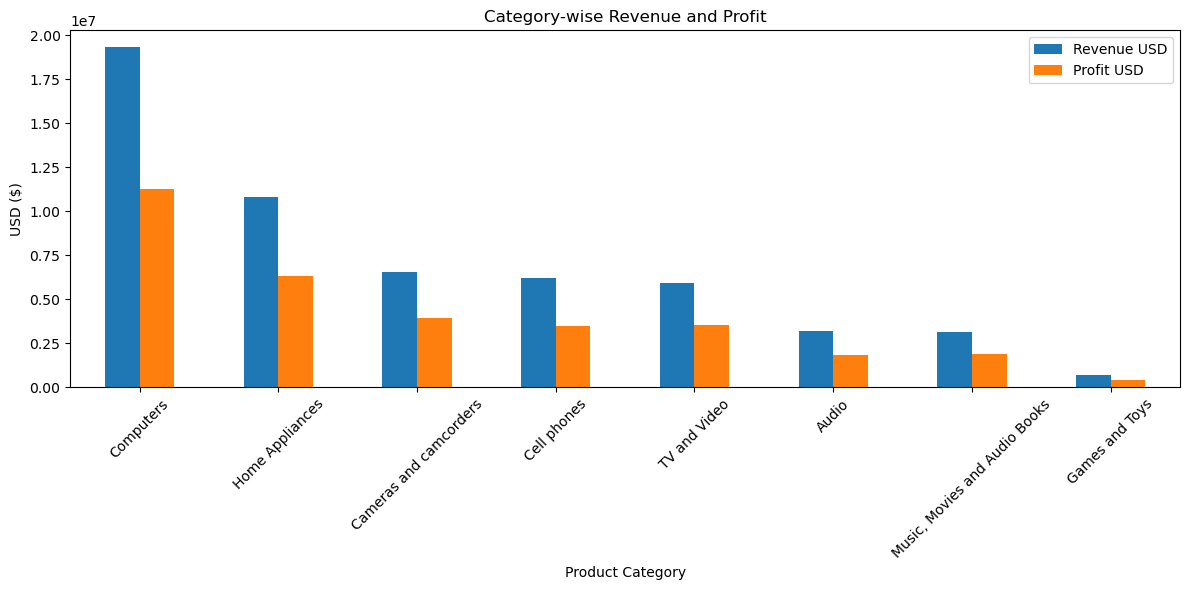

In [103]:
plt.figure(figsize=(12, 6))
category_perf = Sales_df.groupby('Category')[['Revenue USD', 'Profit USD']].sum().sort_values(by='Revenue USD', ascending=False).reset_index()

# Plot
category_perf.plot(x='Category', y=['Revenue USD', 'Profit USD'], kind='bar', figsize=(12, 6))
plt.title('Category-wise Revenue and Profit')
plt.xlabel('Product Category')
plt.ylabel('USD ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Category-wise Revenue and Profit Analysis

This visualization displays the total **Revenue** and **Profit** for each product category, helping identify which categories contribute most to the business.

- **Computers** lead in both revenue and profit.
- **Home Appliances** and **Cameras & Camcorders** follow closely.
- Categories like **Games and Toys** and **Audio Books** have minimal contribution.

This insight helps prioritize inventory, marketing, and investment decisions based on category performance.

In [105]:
## Sub Category wise revenue & profit

<Figure size 1400x600 with 0 Axes>

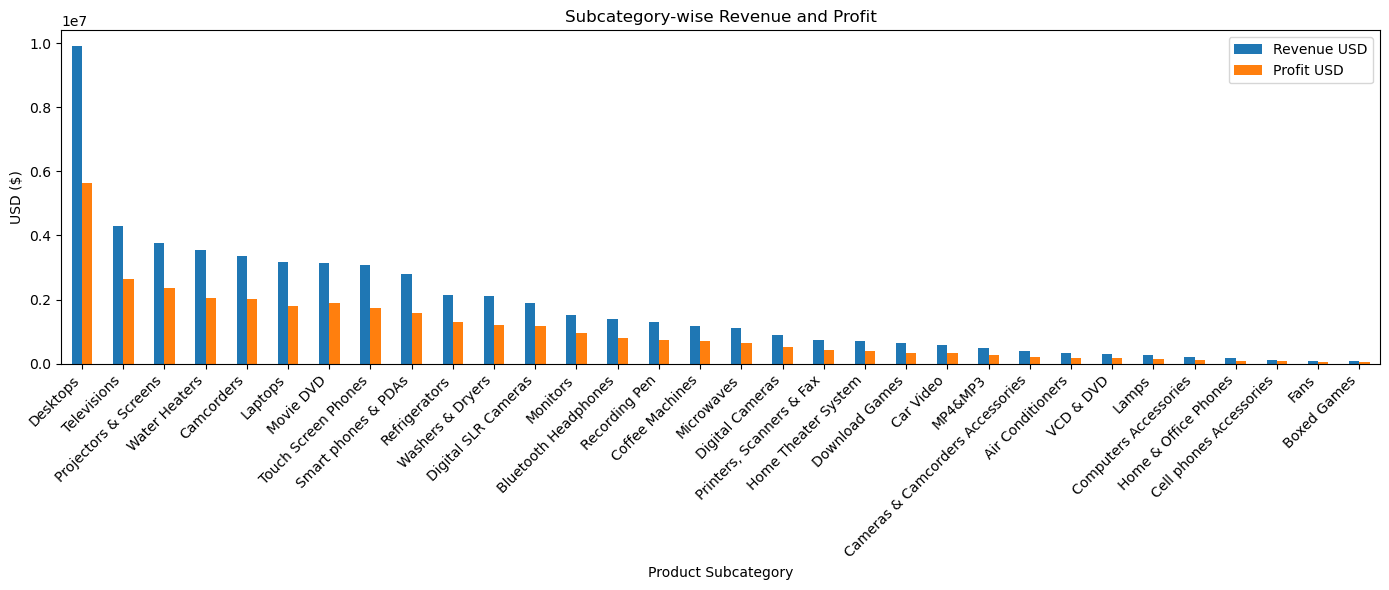

In [106]:
# Group by Subcategory and calculate total revenue and profit
subcategory_perf = Sales_df.groupby('Subcategory')[['Revenue USD', 'Profit USD']].sum().sort_values(by='Revenue USD', ascending=False).reset_index()

# Plot
plt.figure(figsize=(14, 6))
subcategory_perf.plot(x='Subcategory', y=['Revenue USD', 'Profit USD'], kind='bar', figsize=(14, 6))

plt.title('Subcategory-wise Revenue and Profit')
plt.xlabel('Product Subcategory')
plt.ylabel('USD ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  Subcategory-wise Revenue and Profit

This bar chart displays the total revenue and profit generated by each product subcategory. It provides a more detailed view beyond the main categories, helping to identify high-performing subcategories.

- **Desktops**, **Televisions**, and **Projectors & Screens** lead in both revenue and profit.
- Subcategories like **Boxed Games** and **Fans** contribute the least in terms of financial metrics.
- A noticeable drop-off in both revenue and profit can be seen after the top 5–6 subcategories.

This level of analysis can guide decisions on product focus, inventory management, and marketing strategy.


In [108]:
## Monthly revenue & Profit trend

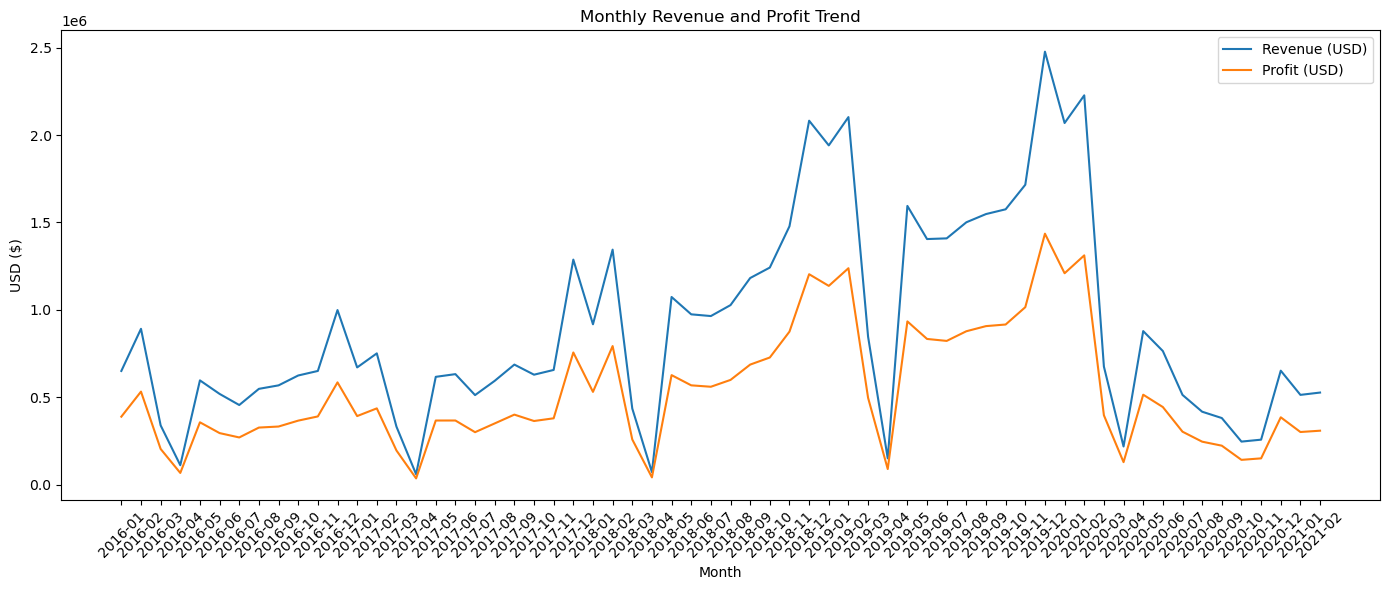

In [109]:
# Ensure Order Date is datetime
Sales_df['Order Date'] = pd.to_datetime(Sales_df['Order Date'])

# Create a 'Year-Month' column
Sales_df['Year-Month'] = Sales_df['Order Date'].dt.to_period('M').astype(str)

# Group by 'Year-Month'
monthly_perf = Sales_df.groupby('Year-Month')[['Revenue USD', 'Profit USD']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_perf, x='Year-Month', y='Revenue USD', label='Revenue (USD)')
sns.lineplot(data=monthly_perf, x='Year-Month', y='Profit USD', label='Profit (USD)')
plt.title('Monthly Revenue and Profit Trend')
plt.xlabel('Month')
plt.ylabel('USD ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

## Monthly Revenue and Profit Trend

This line chart shows the trend of revenue and profit over each month. It helps identify seasonality, sales cycles, and performance peaks over time.

Key observations:
- Noticeable spikes around the end of each year, suggesting seasonal demand (e.g., holidays or sales events).
- Both revenue and profit follow a similar pattern, indicating a consistent profit margin across months.
- Revenue peaks higher than profit, maintaining a healthy margin throughout.

This analysis can assist in strategic decisions like budget allocation, inventory stocking, and marketing planning during high-performing months.

In [111]:
## Performance by brand

<Figure size 1200x600 with 0 Axes>

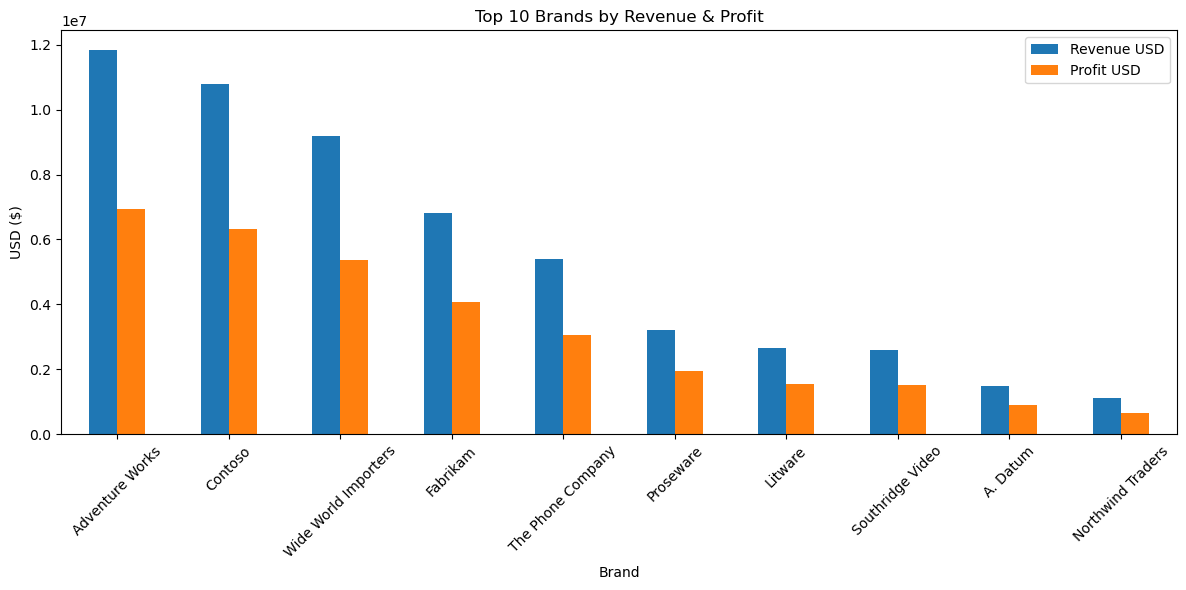

In [112]:
# Group by Brand and calculate total Revenue and Profit
brand_perf = Sales_df.groupby('Brand')[['Revenue USD', 'Profit USD']] \
                     .sum().sort_values(by='Revenue USD', ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
brand_perf.plot(x='Brand', y=['Revenue USD', 'Profit USD'], kind='bar', figsize=(12, 6))
plt.title('Top 10 Brands by Revenue & Profit')
plt.xlabel('Brand')
plt.ylabel('USD ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Brands by Revenue & Profit

This analysis visualizes the top 10 brands based on total **Revenue** and **Profit**.

- **Adventure Works**, **Contoso**, and **Wide World Importers** are the top revenue-generating brands.
- These brands also rank high in profit, indicating strong overall performance.
- The comparison highlights which brands are not only driving sales but also achieving high profitability.

This insight helps identify top-performing brands and can guide product or partnership strategies.

In [114]:
## top 10 countries by total profit

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\3367898578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_countries, x='Country', y='Profit USD', palette='crest')


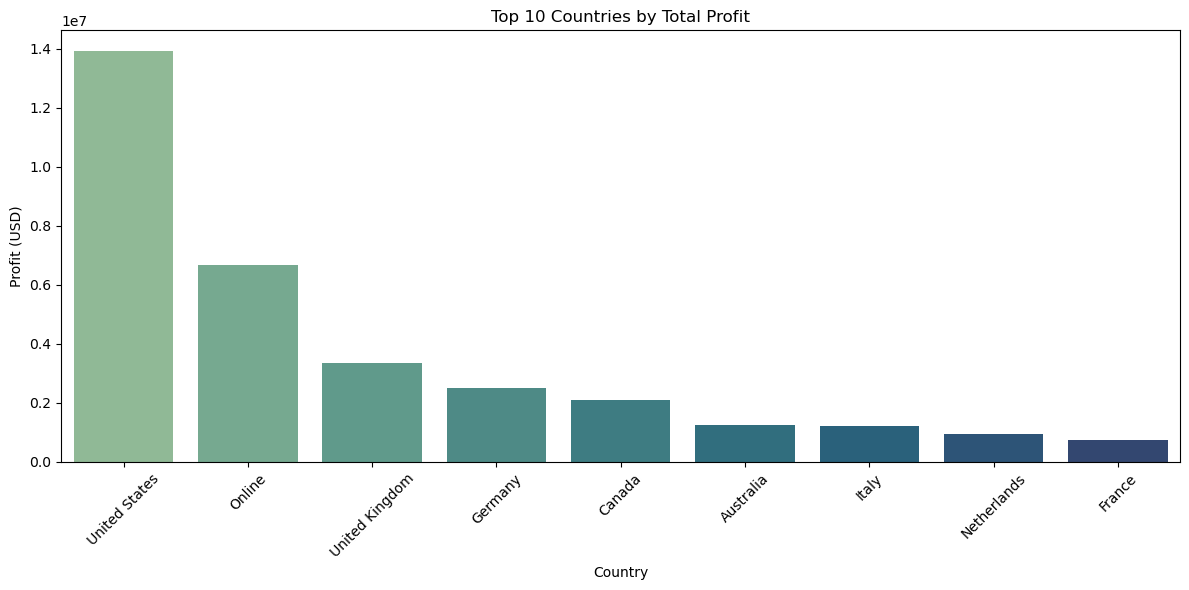

In [115]:
# Total Profit by Country
top_profit_countries = Sales_df.groupby('Country')['Profit USD'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_profit_countries, x='Country', y='Profit USD', palette='crest')
plt.title('Top 10 Countries by Total Profit')
plt.xlabel('Country')
plt.ylabel('Profit (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
## Top 10 states by total profit

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\3088068127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_profit_no_online, x='State', y='Profit USD', palette='viridis')


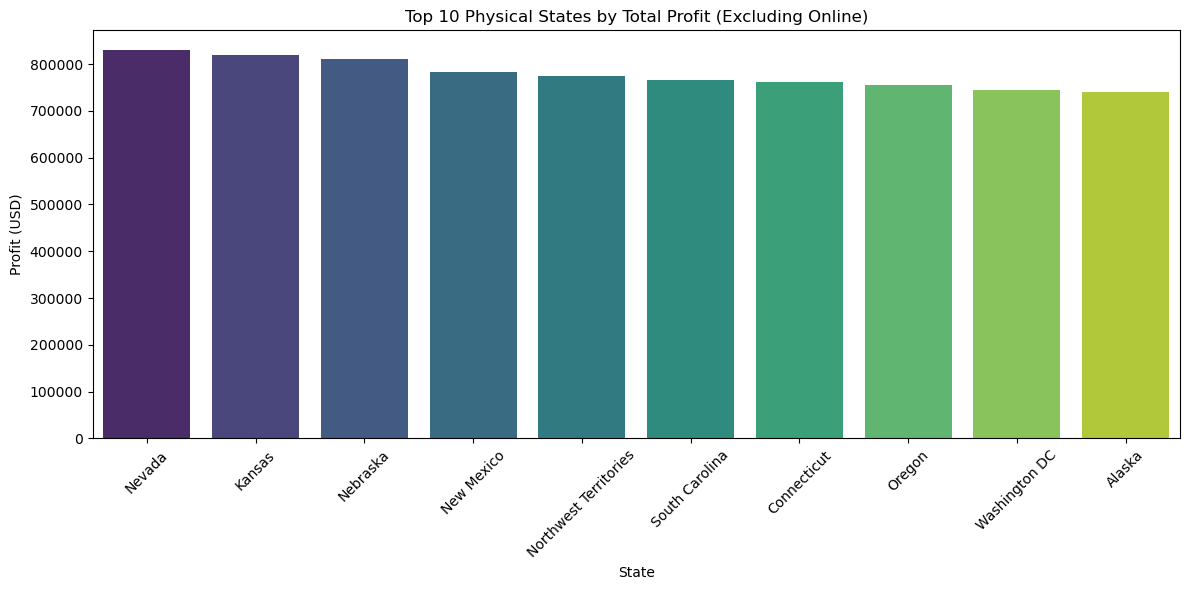

In [117]:
# Remove 'Online' and get top 10 real states
state_profit_no_online = Sales_df[Sales_df['State'] != 'Online'].groupby('State')[['Profit USD']]\
                            .sum().sort_values(by='Profit USD', ascending=False).head(10).reset_index()

# Plot without 'Online'
plt.figure(figsize=(12,6))
sns.barplot(data=state_profit_no_online, x='State', y='Profit USD', palette='viridis')
plt.title('Top 10 Physical States by Total Profit (Excluding Online)')
plt.ylabel('Profit (USD)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Top 10 Physical States by Total Profit

This analysis identifies the top 10 **physical store locations** (excluding 'Online') based on their **total profit (USD)**.

#### Key Points:
- The data excludes the 'Online' state to focus only on physical retail locations.
- States like **Nevada**, **Kansas**, and **Nebraska** lead in total profit.
- Each of the top 10 states contributes over **$700K+** in profit, indicating strong regional performance.
- These states might be high-priority regions for scaling or targeted marketing.

The bar chart below visualizes total profit per state using the **'viridis'** color palette for a clean gradient effect.


### Return Analysis
This dataset does not contain any transactions with negative quantities, which typically indicate returned products. Therefore, a return analysis could not be performed.
However, had such data been available, we would have analyzed:
- Total quantity returned by category or product
- Associated revenue and profit lost
- Return rate trends over time or by store


In [230]:
# Top Customers by revenue

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\4063747619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


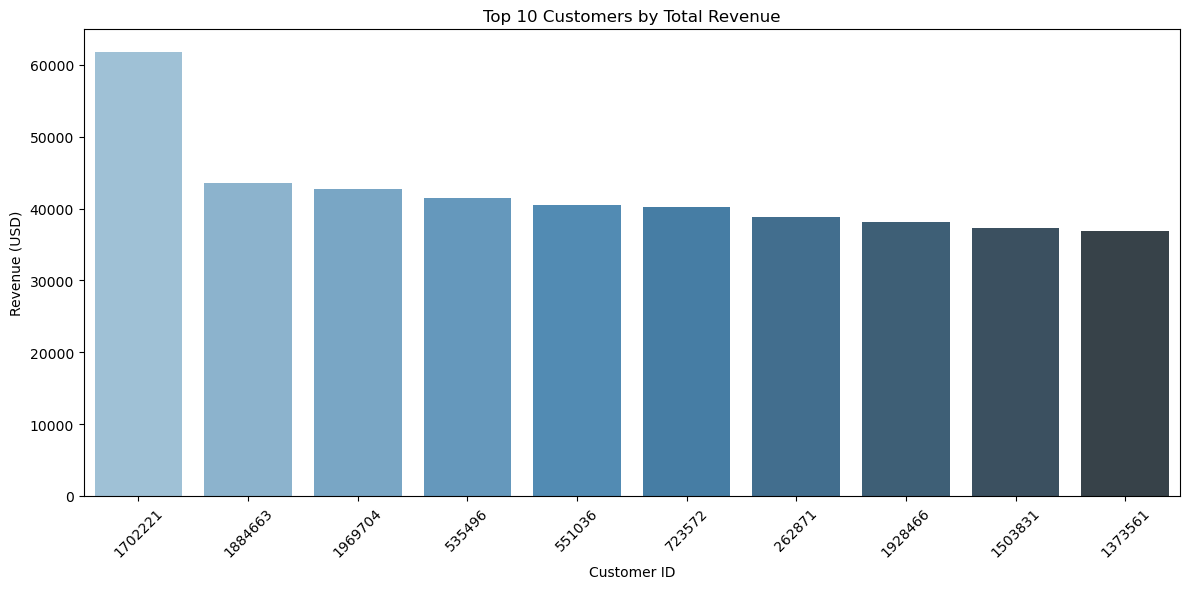

In [234]:
# Sort by revenue
top_customers = customer_perf.sort_values(by='Revenue USD', ascending=False).head(10)

# Plot with enforced order
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_customers,
    x='CustomerKey',
    y='Revenue USD',
    order=top_customers['CustomerKey'],  # enforce descending order
    palette='Blues_d'
)
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Top 10 Customers by Total Revenue

#### **Key Insights**

- **Customer 170221** is by far the most valuable customer, generating over $60,000 in revenue - **~40% higher** than the second-highest contributer.
- The remaining top 9 customers each contribute between \\\$37,000-\\\$45,000, indicating a relatively consistent revenue pattern among them.
- This chart reveals a **heavy reliance on a single high-value customer**, potentially creating revenue concentration risk.
- There's an opportunity to:
  - **Strengthen relationships** with the top 3–5 customers to increase their lifetime value.
  - **Diversify revenue sources** by acquiring or nurturing mid-tier customers to reduce dependency on the top contributor.

C:\Users\shant\AppData\Local\Temp\ipykernel_11968\4293151034.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


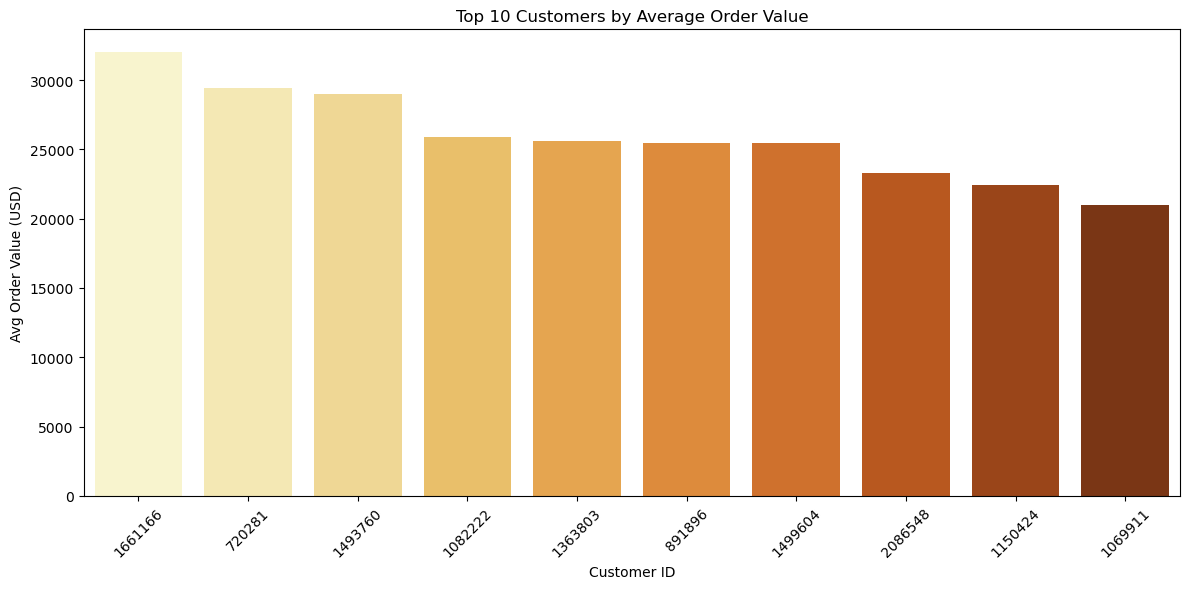

In [236]:
# Compute Total Orders per Customer
order_counts = Sales_df.groupby('CustomerKey')['Order Number'].nunique().reset_index()
order_counts.rename(columns={'Order Number': 'Total Orders'}, inplace=True)

# Merge with existing revenue data
customer_perf = customer_perf.merge(order_counts, on='CustomerKey')

# Calculate Average Order Value (AOV)
customer_perf['Avg Order Value (USD)'] = customer_perf['Revenue USD'] / customer_perf['Total Orders']

# View Top 10 Customers by AOV
top_aov_customers = customer_perf.sort_values(by='Avg Order Value (USD)', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_aov_customers,
    x='CustomerKey',
    y='Avg Order Value (USD)',
    order=top_aov_customers['CustomerKey'],
    palette='YlOrBr'
)
plt.title('Top 10 Customers by Average Order Value')
plt.xlabel('Customer ID')
plt.ylabel('Avg Order Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 10 Customers by Average Order Value

#### **Key Insights**

- **Customer 1661166** stands out with the highest average order value, exceeding \\\$31,000, suggesting high-value transactions per order.
- The top 3 customers (1661166, 720281, and 1493760) show a significant lead over others, with average orders close to or above \\\$29,000.
- This list reflects customers who may not place frequent orders but tend to spend **large amounts per transaction**.
- Identifying and targeting such customers with **premium offerings, loyalty programs**, or **personalized services** could maximize profitability.
- The average order value gradually declines among the top 10, with **Customer 1069911** at the bottom still contributing over $21,000 per order, which is substantial.

In [240]:
# Store level insights

In [238]:
# Create a new column for store age in years
Sales_df['Store Age (Years)'] = 2025 - Sales_df['Open Date'].dt.year

# Aggregate performance by store
store_perf = Sales_df.groupby(['StoreKey', 'Country', 'State']).agg({
    'Revenue USD': 'sum',
    'Profit USD': 'sum',
    'Profit Margin (%)': 'mean',
    'Square Meters': 'mean',
    'Store Age (Years)': 'mean'
}).sort_values(by='Revenue USD', ascending=False).reset_index()

# Round the numbers for readability
store_perf = store_perf.round(2)

# Show top 10 stores
store_perf.head(10)


,StoreKey,Country,State,Revenue USD,Profit USD,Profit Margin (%),Square Meters,Store Age (Years)
0,0,Online,Online,11404324.63,6672692.64,54.85,1347.5,15.0
1,55,United States,Nevada,1417885.41,830551.75,54.68,2000.0,16.0
2,50,United States,Kansas,1394738.06,819659.12,55.01,2000.0,17.0
3,54,United States,Nebraska,1384396.24,810300.06,54.92,2000.0,12.0
4,9,Canada,Northwest Territories,1336150.06,774757.55,54.77,1500.0,20.0
5,57,United States,New Mexico,1325611.89,784095.76,54.96,1645.0,15.0
6,45,United States,Connecticut,1318787.92,761271.82,54.79,2000.0,18.0
7,61,United States,South Carolina,1305684.43,764997.20,54.88,2000.0,13.0
8,59,United States,Oregon,1302272.44,754702.32,54.68,2000.0,13.0
9,64,United States,Washington DC,1259350.98,745283.99,55.08,1330.0,15.0


## Store-Level Performance Insights
**Top Performing Store:**
The Online store (StoreKey 0) generated the highest revenue of approx \\\$11.4M and profit of $6.67M accounting for a significant portion of total sales. This suggests strong digital channel performance.

**High Performers by Revenue:**
Physical stores in **Nevada, Kansas, and Nebraska** followed with revenues between \\\$1.3M and $1.4M, indicating strong regional performance across the United States.

**Profit Margins:**
Average profit margins across top stores range from **~54.7% to 55.1%**, indicating a stable pricing strategy across locations.

**Store Sizes & Age:** 
Most top-performing physical stores are large-format stores (**~2000 square meters**) and relatively mature, with an average age of **12–18 years**, suggesting that well-established locations drive higher revenues.

**Observation:**  
Both digital and brick-and-mortar channels are profitable. However, the **Online store significantly outperforms** others, indicating potential for further digital investment.


## Conclusion & Business Recommendations

### Key Takeaways:

- **Top Products:**  
  High-end desktop PCs dominate the revenue chart, all priced above $900 with consistent profit margins (~66%). Strong demand in the computing segment is evident.

- **Category Leaders:**  
  "Computers" and "Home Appliances" are the most profitable categories, wi\\\th over \\\$4M and $2.1M in revenue respectively. Digital categories like Music & Movies have the highest margins (~57%) despite lower sales.

- **Customer Trends:**  
  Majority of high-value customers are located in the United States and Canada. Gender and location segmentation can guide personalized marketing.

- **Store Insights:**  
  The Online store is the single biggest contributor to revenue (~$11.4M), outperforming even the largest physical stores. Among physical stores, those with larger area and longer operating history tend to perform better.

- **Delivery Patterns:**  
  Average delivery time is consistent, but a significant portion of records (~79%) lack delivery dates, which could indicate system or data collection issues.

### Business Recommendations:

1. **Double Down on Digital:**  
   Invest further in the Online store — it significantly outpaces physical stores in both reach and revenue.

2. **Product Portfolio Focus:**  
   Expand or promote the premium desktop PC segment. Consider bundling with high-margin accessories or services.

3. **Fix Delivery Data Collection:**  
   High rate of missing delivery data suggests a process gap. This needs urgent attention to enable better logistics analysis.

4. **Regional Strategy:**  
   Explore expansion in regions where stores like Nevada, Kansas, and Nebraska perform well. These areas could benefit from additional stores or localized campaigns.

5. **Customer Personalization:**  
   Use gender and location data to launch targeted promotions, especially for loyal high-spending segments.
